# Matrix as transformation and interpreting low rank matrix

## Goals

### G1: To understand matrix vector multiplication as transformation of the vector


Multiplying a matrix A with a vector x transforms x

![](Ax-combined.png)

### G2: Understanding low rank matrices as applying transformation on a vector resulting in a subspace of the original vector space

Transforming a vector via a low rank matrix in the shown examples leads to a line

![](lr-combined.png)



We first study Goal 1. The interpretation of matrix vector product is borrowed from the excellent videos from the [3Blue1Brown channel](https://www.youtube.com/watch?v=kYB8IZa5AuE). I'll first set up the environment by importing a few relevant libraries. 

#### Basic imports

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
from sympy import Matrix, MatrixSymbol, Eq, MatMul

sns.reset_defaults()
sns.set_context(context="talk", font_scale=0.75)
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [2]:
sympy_A = MatrixSymbol("A", 2, 2)
sympy_x = MatrixSymbol("x", 2, 1)
y = MatrixSymbol("y", 2, 1)

Eq(y, sympy_A*sympy_x, evaluate=False)

Eq(y, A*x)

Given a matrix `A` and a vector `x`, we are trying to get `y=Ax`. Let us first see the values for a specific instance in the 2d space.

In [3]:
A = np.array([[2, 1], [1, 4]])

x = np.array([1, 1])
Ax = A @ x

Eq(Matrix(Ax), MatMul(Matrix(A), Matrix(x)),evaluate=False)

Eq(Matrix([
[3],
[5]]), Matrix([
[2, 1],
[1, 4]])*Matrix([
[1],
[1]]))

Here, we have A = $\left[\begin{matrix}2 & 1\\1 & 4\end{matrix}\right]$ and x = ${\text{[1 1]}}$

Now some code to create arrows to represent arrows.

In [4]:
def plot_arrow(ax, x, color, label):
    x_head, y_head = x[0], x[1]
    x_tail = 0.0
    y_tail = 0.0
    dx = x_head - x_tail
    dy = y_head - y_tail

    arrow = mpatches.FancyArrowPatch(
        (x_tail, y_tail), (x_head, y_head), mutation_scale=10, color=color, label=label
    )

    ax.add_patch(arrow)
    ax.legend(bbox_to_anchor=(1.6, 1), borderaxespad=0)

Now some code to plot the vector corresponding to Ax

In [5]:
def plot_transform(A, x):
    Ax = A @ x
    fig, ax = plt.subplots()
    plot_arrow(ax, x, "k", f"Original (x) {x}")
    plot_arrow(ax, Ax, "g", f"Transformed (Ax) {Ax}")
    plt.xlim((-5, 5))
    plt.ylim((-5, 5))
    plt.grid(alpha=0.1)
    ax.set_aspect("equal")
    plt.title(f"A = {A}")
    sns.despine(left=True, bottom=True)
    plt.tight_layout()

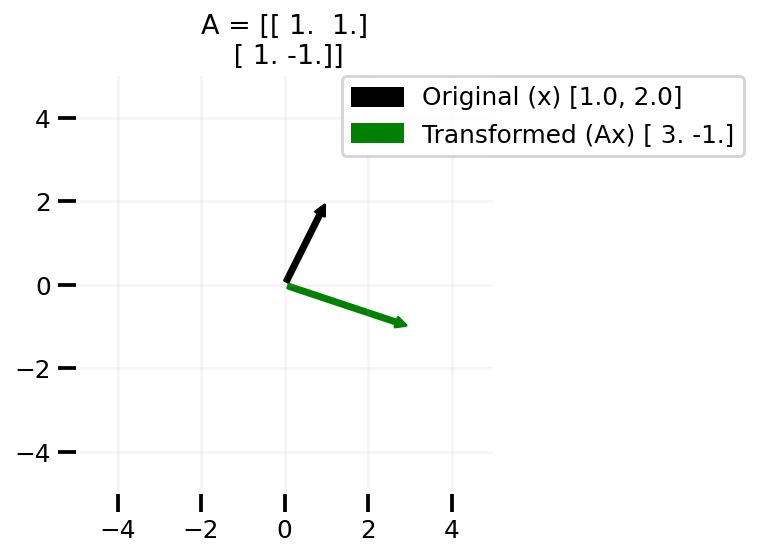

In [6]:
plot_transform(np.array([[1.0, 1.0], [1.0, -1.0]]), [1.0, 2.0])
plt.savefig("Ax1.png", dpi=100)

In the plot above, we can see that the vector [1, 2] is transformed to [3, -1] via the matrix A.

Let us now write some code to create the rotation matrix and apply it on our input x

In [7]:
def rot(angle):
    theta = np.radians(angle)
    c, s = np.cos(theta), np.sin(theta)
    R = np.array(((c, -s), (s, c)))
    return np.round(R, 2)

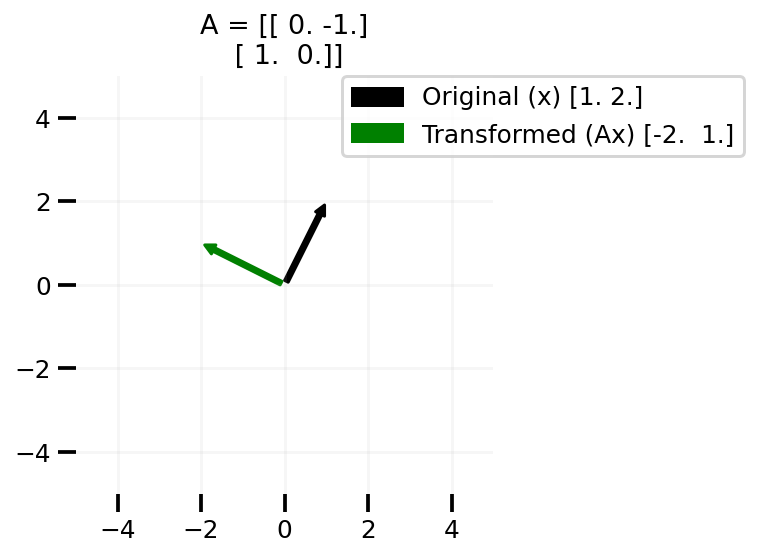

In [8]:
x = np.array([1.0, 2.0])
plot_transform(rot(90), x)
plt.savefig("Ax2", dpi=100)

As we can see above, creating the 90 degree rotation matrix indeed transforms our vector anticlockwise 90 degrees.

Now let us talk about matrices A that are low rank. I am creating a simple low rank matrix where the second row is some constant times the first row.

In [9]:
def plot_lr(x, slope):
    low_rank = np.array([1.0, 2.0])
    low_rank = np.vstack((low_rank, slope * low_rank))
    plot_transform(low_rank, x)
    x_lin = np.linspace(-5, 5, 100)
    y = x_lin * slope
    plt.plot(x_lin, y, alpha=0.4, lw=5, label=f"y = {slope}x")
    plt.legend(bbox_to_anchor=(1.2, 1), borderaxespad=0)

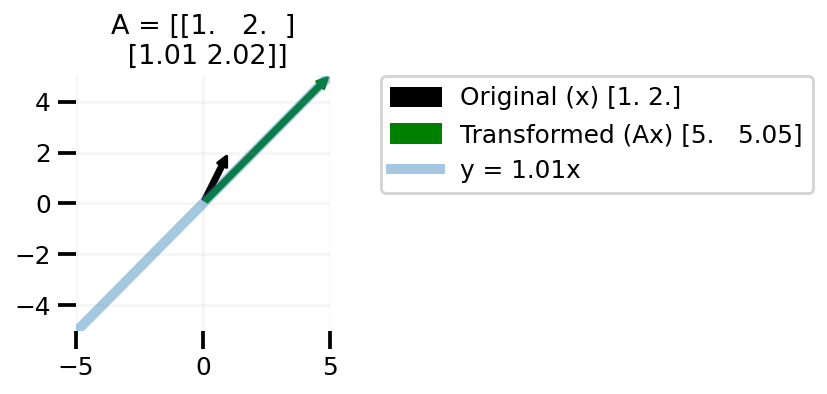

In [10]:
plot_lr(x, 1.01)
plt.tight_layout()
plt.savefig("lr-1.png", bbox_inches="tight", dpi=100)

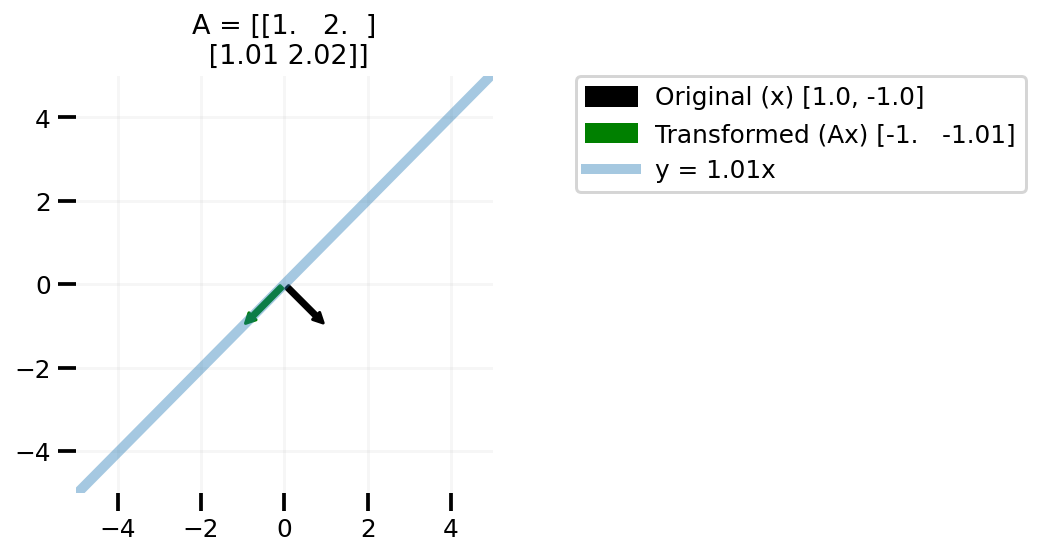

In [11]:
plot_lr([1.0, -1.0], 1.01)
plt.tight_layout()
plt.savefig("lr-2.png", bbox_inches="tight", dpi=100)

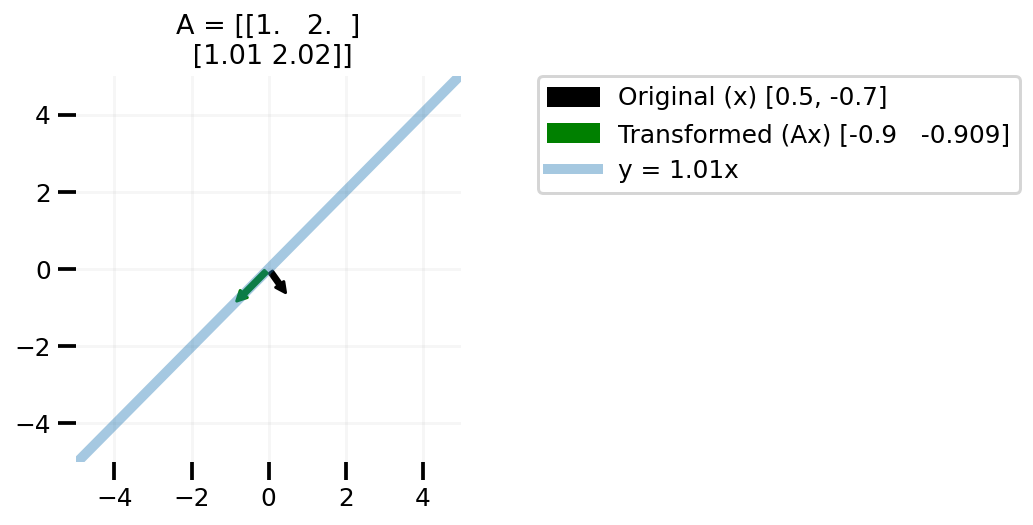

In [12]:
plot_lr([0.5, -0.7], 1.01)
plt.tight_layout()
plt.savefig("lr-3.png", bbox_inches="tight", dpi=100)

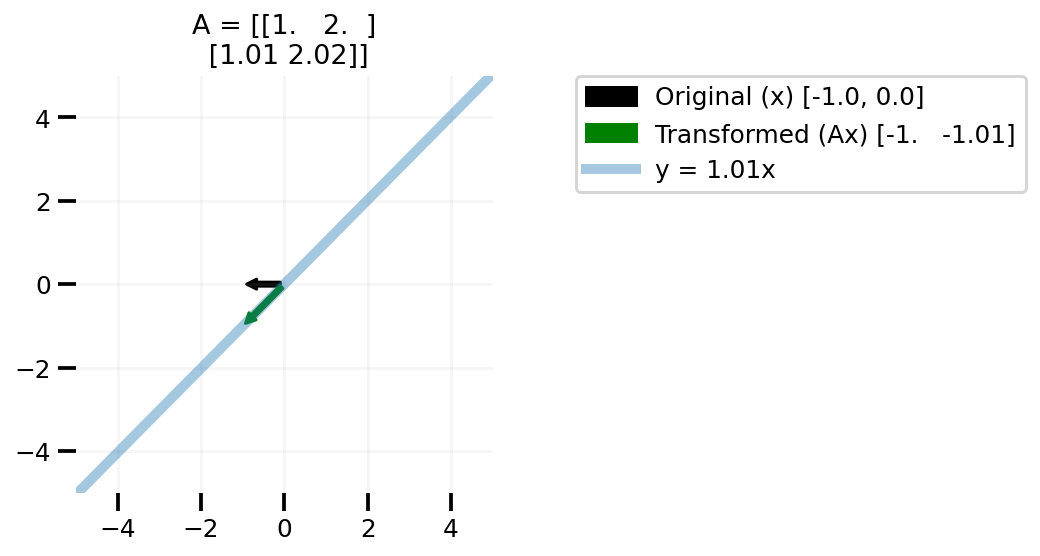

In [13]:
plot_lr([-1.0, 0.0], 1.01)
plt.tight_layout()
plt.savefig("lr-4.png", bbox_inches="tight", dpi=100)

To summarize

![](lr-combined.png)


In the above plots we can see that changing our x to any vector in the 2d space leads to us to transformed vector not covering the whole 2d space, but on line in the 2d space. One can easily take this learning to higher dimensional matrices A. 